## **Parcial #1**

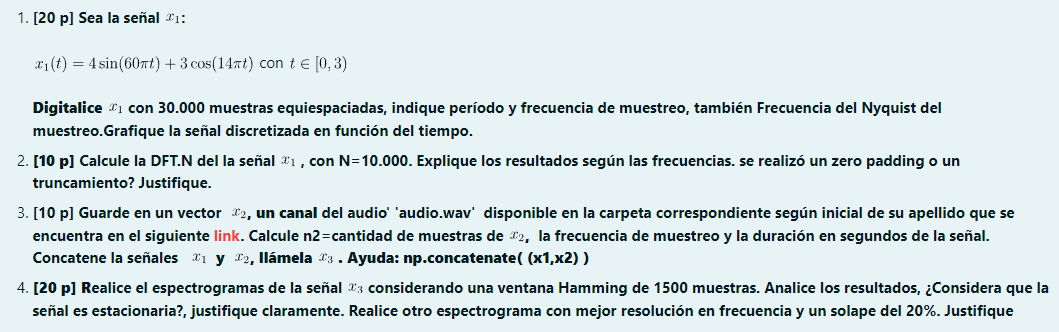

In [1]:
# se importan librerias necesarias
import numpy as np 
from scipy.io.wavfile import read, write  #para leer y guardar archivos de audio formato wav
import matplotlib.pyplot as plt
from scipy.fftpack import fft,fftshift
from scipy import signal
import pywt

### Primer punto

In [18]:
PI = np.pi # variable PI
M = 30000 # numero de muestras

fm = M/3 # freq. de muestreo -> cant. total de muestras dividido la longitud del intervalo temporal
pm = 1/fm # periodo de muestreo -> cada cuanto se realiza una muestra

print("Cantidad de muestras: ", M, "muestras")
print("Freq. de muestreo: ", fm)
print("Período de muestreo: ", pm, "[s]")

# genero el vector de tiempos discretizados
t = np.arange(0,3,pm)
print(t)

# se define la señal x1
x1 = (4*np.cos(60*PI*t))+(3*np.cos(14*PI*t))

Cantidad de muestras:  30000 muestras
Freq. de muestreo:  10000.0
Período de muestreo:  0.0001 [s]
[0.0000e+00 1.0000e-04 2.0000e-04 ... 2.9997e+00 2.9998e+00 2.9999e+00]


In [3]:
N = 10000
# se pasan las frecuencias a Hz
k = np.arange(0,N) # vector de frecuencia
kc = np.arange(-N/2,N/2) # vector de frecuencia centrado

fr_Hz=k*fm/N # vector de frecuencia en Hz
fr_Hz_centrada = kc*fm/N # vector de frecuencia en Hz centrado

print(len(fr_Hz), len(fr_Hz_centrada))

10000 10000


Text(0.5, 0, 'Tiempo [s]')

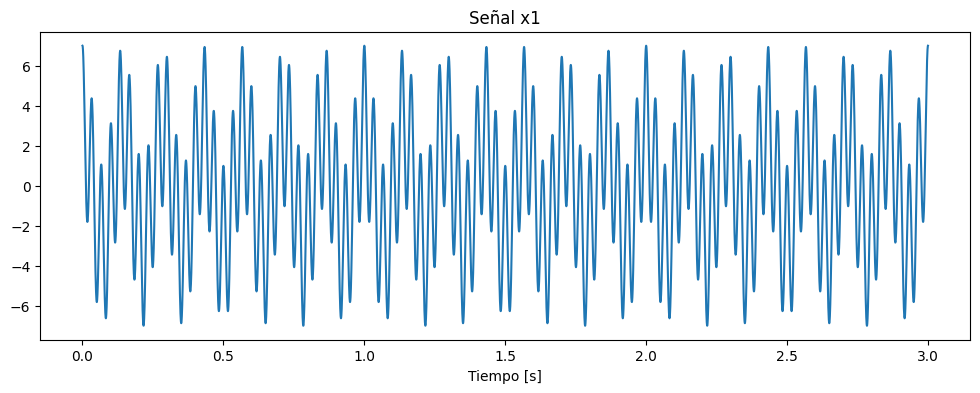

In [4]:
# grafico la señal
plt.figure(figsize=(12,4))
plt.plot(t,x1)
plt.title("Señal x1")
plt.xlabel("Tiempo [s]")

### Segundo punto

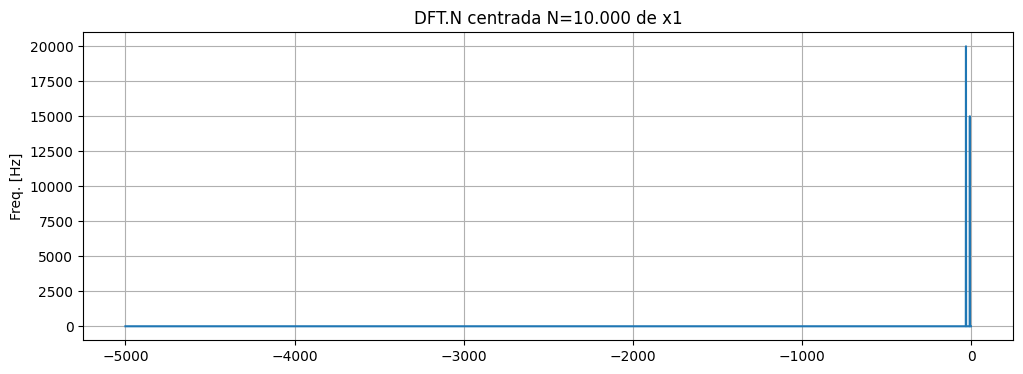

Se realizó truncamiento


In [5]:
#N = 10000 # numero de puntos para DFT.N
DFTx1 = fft(x1,N)
DFTx1 = fftshift(DFTx1) # centro la transformada de la señal
plt.figure(figsize=(12,4))
plt.title("DFT.N centrada N=10.000 de x1")
plt.plot(fr_Hz_centrada[0:N//2],(abs(DFTx1[0:N//2])))
plt.grid(True)
plt.ylabel("Freq. [Hz]")
plt.show()

# se verifica si se realizó un zeropadding o un truncamiento
if(M>N):
    # el numero de muestras es mayor al N de la DFT => se trunca parte de la señal
    print("Se realizó truncamiento")
else:
    # el numero de muestras es menor al N de la DFT => sobran espacios que se rellenan con 0
    print("Se realizó zero-padding")

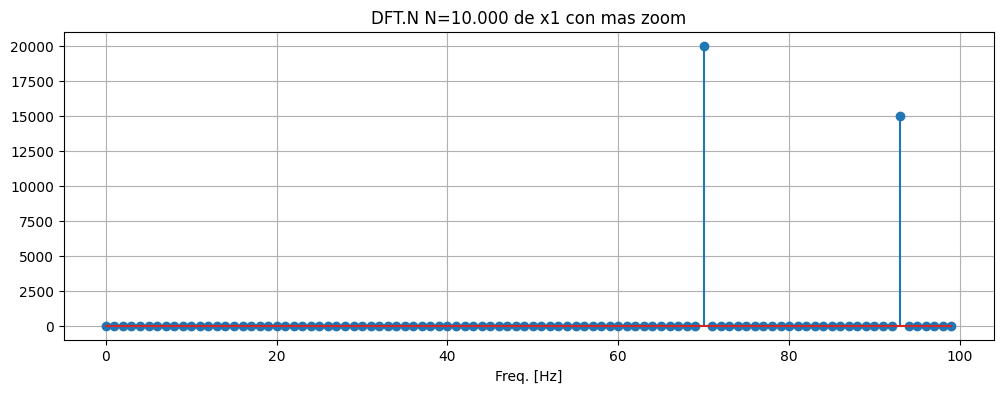

In [6]:
# hago más zoom en la transformada
plt.figure(figsize=(12,4))
plt.title("DFT.N N=10.000 de x1 con mas zoom")
plt.stem(abs(DFTx1[4900:N//2]))
plt.grid(True)
plt.xlabel("Freq. [Hz]")
plt.show()

Se ve que la DFT.N con $N=10.000$ devuelve en frecuencia solamente dos picos. Por lo tanto, en principio la señal es estacionaria. 
Para que fuera no estacionaria, deberían verse varios picos en el dominio frecuencial.

### Punto #3

Freq. muestreo:  10000 [Hz]
Cantidad de muestras:  30000
Duracion x2:  3.0 [s]


Text(0.5, 0, 'Tiempo [s]')

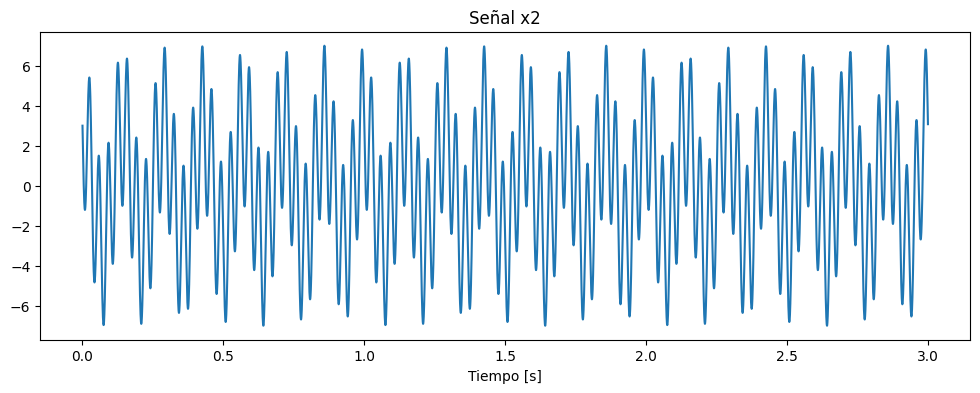

In [7]:
audio = read("audio.wav")

fmAudio = audio[0]
x2 = audio[1] # me quedo con el unico canal de la señal x2
M2 = len(x2) # cantidad de muestras de la señal x2
time2 = M2/fmAudio
print("Freq. muestreo: ", fmAudio, "[Hz]")
print("Cantidad de muestras: ", M2)
print("Duracion x2: ", time2, "[s]")

# se grafica la señal de audio
plt.figure(figsize=(12,4))
plt.plot(t,x2)
plt.title("Señal x2")
plt.xlabel("Tiempo [s]")


Text(0.5, 0, 'Tiempo [s]')

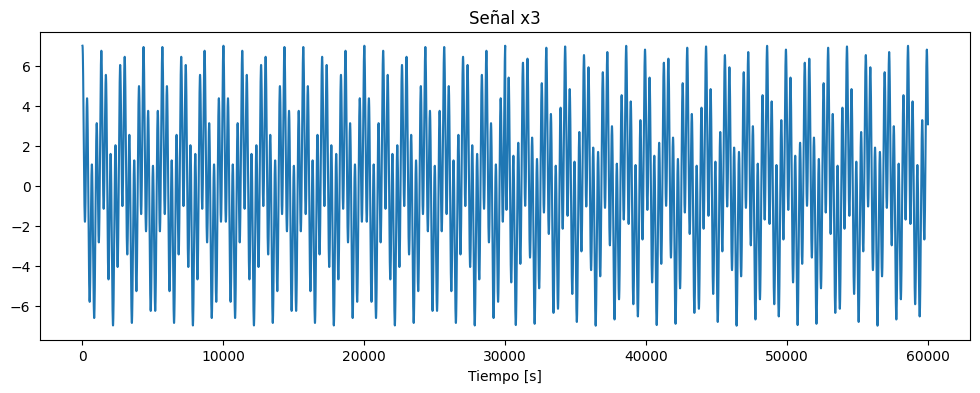

In [8]:
# concateno las dos señales
x3 = np.concatenate((x1,x2))

# se grafica la señal concatenada
plt.figure(figsize=(12,4))
plt.plot(x3)
plt.title("Señal x3")
plt.xlabel("Tiempo [s]")

### Punto 4

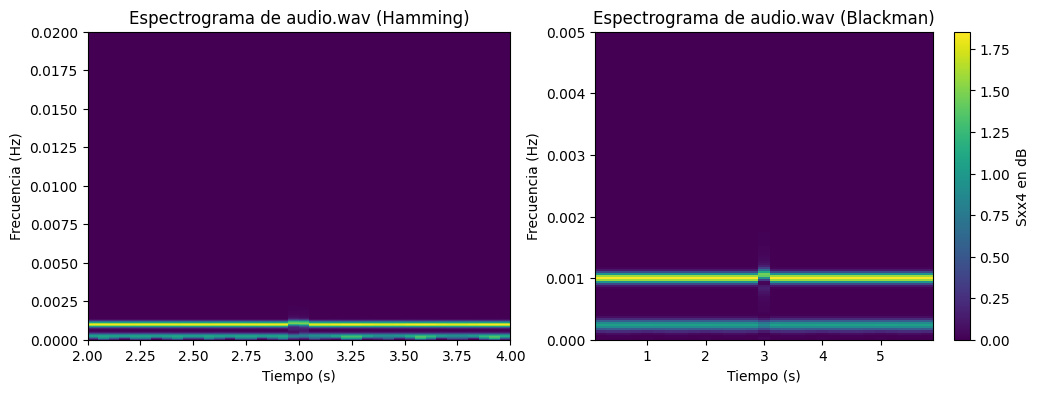

In [17]:
w1 = signal.hamming(1500)
w2 = signal.blackman(4000)
f3, t3, Sxx3 = signal.spectrogram(x3,fs=fm, window=w1,nfft=N, noverlap=1000) 
f3 = f3/M


#dbSxx3=20*np.log10(1+abs(Sxx3)) #se convierte a decibeles para una mejor visualización
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.pcolormesh(t3, f3, Sxx3)
plt.ylim(0,0.02)
plt.xlim(2,4)
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')
plt.title('Espectrograma de audio.wav (Hamming)')

f4, t4, Sxx4 = signal.spectrogram(x3,fs=fm, window=w2,nfft=N, noverlap=2000) 
f4 = f4/M

#dbSxx4=20*np.log10(1+abs(Sxx4)) #se convierte a decibeles para una mejor visualización
plt.subplot(122)
plt.pcolormesh(t4, f4, Sxx4)
plt.ylim(0,0.005)
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')
plt.title('Espectrograma de audio.wav (Blackman)')
plt.colorbar(label='Sxx4 en dB')

plt.show()